## Ejercicio 2: Python y NLTK. POS tagging

Objetivo: Uso de NLTK y Python. Procesamiento de corpus, POS tagging.
Referencias: 
http://www.nltk.org/
http://www.python.org/ 
1. Procesamiento del corpus cess_esp anotado con información morfosintáctica.

        • Descargar corpus usando NLTK.
        • Procesar el corpus para transformar la anotación de las etiquetas originales 
        (289 etiquetas) a un conjunto reducido (66 etiquetas). Para realizar esta 
        transformación utilizar los siguientes criterios: todas las etiquetas serán de 
        longitud igual a 2 por defecto, salvo los verbos (v) y los signos de puntuación 
        (F) que pueden ser de tres. También pueden existir etiquetas de longitud =1. 
        En el conjunto transformado también se deben eliminar anotaciones de la 
        forma: (u'*0*', u'sn'). 
        • Nota: para entender el significado de las etiquetas se puede consultar el 
        siguiente enlace: 
        https://freeling-user-manual.readthedocs.io/en/latest/tagsets/
        • Dividir el corpus en dos partes: training (el 90% de las primeras frases) y de 
        test (el 10% restante)

### Carga del corpus

In [1]:
import nltk 

In [2]:
from nltk.corpus import cess_esp

In [3]:
corpus_sentences=cess_esp.tagged_sents() # extraemos las oraciones etiquetadas

#### Transformar la anotación de las etiquetas originales (289 etiquetas) a un conjunto reducido (66 etiquetas)

In [3]:
corpus_sentences=cess_esp.tagged_sents() # extraemos las oraciones etiquetadas
number_sentences=len(corpus_sentences)
print ('Número de frases:',number_sentences)
nw=0;
for s in range (len(corpus_sentences)):
    nw=nw+len(corpus_sentences[s])

print ('Número de palabras:',nw)

print(corpus_sentences[0:2]) # muestro las 2 primeras oraciones del corpus etiquetado

Número de frases: 6030
Número de palabras: 192686
[[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')], [('Una', 'di0fs0'), ('portavoz', 'nccs000'), ('de', 'sps00'), ('EDF', 'np00000'), ('explicó', 'vmis3s0

In [4]:
def rename(x):
    if x.startswith("v") or x.startswith("F"): #Si la etiqueta es de un verbo o signo de
        return x[:min(len(x),3)] #longitud máxima puede ser 3
    
    else: #Cualquier otra etiqueta long max
        return x[:min(len(x),2)] # por defecto, para lo demás la long máx es 2

In [5]:
newsentences=[]
for sentence in corpus_sentences:
    newsent=[(x[0], rename(x[1])) for x in sentence if not(x[1] in (u'*0*',u'sn'))] # elimino este tipo de etiquetas porque directamente las omito
    newsentences.append(newsent)

In [6]:
print(newsentences[:20])

[[('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da'), ('compra', 'nc'), ('del', 'sp'), ('51_por_ciento', 'Zp'), ('de', 'sp'), ('la', 'da'), ('empresa', 'nc'), ('mexicana', 'aq'), ('Electricidad_Águila_de_Altamira', 'np'), ('-Fpa-', 'Fpa'), ('EAA', 'np'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq'), ('por', 'sp'), ('el', 'da'), ('japonés', 'aq'), ('Mitsubishi_Corporation', 'np'), ('para', 'sp'), ('poner_en_marcha', 'vmn'), ('una', 'di'), ('central', 'nc'), ('de', 'sp'), ('gas', 'nc'), ('de', 'sp'), ('495', 'Z'), ('megavatios', 'nc'), ('.', 'Fp')], [('Una', 'di'), ('portavoz', 'nc'), ('de', 'sp'), ('EDF', 'np'), ('explicó', 'vmi'), ('a', 'sp'), ('EFE', 'np'), ('que', 'cs'), ('el', 'da'), ('proyecto', 'nc'), ('para', 'sp'), ('la', 'da'), ('construcción', 'nc'), ('de', 'sp'), ('Altamira_2', 'np'), (',', 'Fc'), ('al

2. Uso de etiquetadores morfosintácticos (usar los modelos hmm y tnt). 

    • Saber entrenar el etiquetador con la partición de entrenamiento previamente 
    transformada 
    
    • Saber etiquetar un conjunto de test con el modelo aprendido 
    
    • Evaluar las prestaciones de un etiquetador   
    

3. Hacer una evaluación de las prestaciones de etiquetado usando todo el corpus (10-fold cross validation). Se propone hacer las 10 particiones usando el corpus reducido en el orden original y barajándolo (sugerencia: se puede usar el método shuffle importándolo del módulo random “from random import shuffle”). Comprobar si al barajar el corpus se observan diferencias en los resultados de cada partición

### HMM

#### Entrenamos un HMM 

In [7]:
from sklearn.model_selection import train_test_split
from nltk.tag import hmm

def hmm_model(data, s=False): 
    # dividir conjunto de entrenamiento: 90% train, 10% test
    train,test= train_test_split(data,test_size=0.1, random_state=1234, shuffle=s) # train test split tiene un shuffle default
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train) # le pasamos la lista de listas para entrenar
    acc=tagger_hmm.accuracy(test)

    return acc

In [8]:
print("Accuracy del tagger HMM para el conjunto de datos original:", hmm_model(newsentences, False))
print()
print("Accuracy del tagger HMM para el conjunto de datos barajado:", hmm_model(newsentences, True))

Accuracy del tagger HMM para el conjunto de datos original: 0.8895248998282771

Accuracy del tagger HMM para el conjunto de datos barajado: 0.925679983000425


A la vista de los resultados obtenidos, podemos observar que cuando se barajan los datos el accuracy general es mayor.

#### Realizamos un 10-Fold

In [9]:
import numpy as np 
from sklearn.model_selection import KFold 

def KFold_hmm(data, folds, s=False):
    newsentences=np.asarray(data) 
    kf=KFold(n_splits=folds, shuffle=s) # shuffle default=False
    scores=[]
    longitudes=[]
    for train_index, test_index in kf.split(newsentences): 
        x_train,x_test = newsentences[train_index],newsentences[test_index]  
        longitudes.append(len(x_test))
        tagger_hmm=hmm.HiddenMarkovModelTagger.train(x_train)  
        result=tagger_hmm.accuracy(x_test) 
        scores.append(result)
       
    return scores,longitudes

In [10]:
s, l=KFold_hmm(newsentences, 10, s=False)
for i in s: print('Accuracy del HMM para los datos originales:', i)

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\1255201757.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


Accuracy del HMM para los datos originales: 0.9302101576182137
Accuracy del HMM para los datos originales: 0.9267685744756488
Accuracy del HMM para los datos originales: 0.9249848497965544
Accuracy del HMM para los datos originales: 0.9277964181445815
Accuracy del HMM para los datos originales: 0.9262966333030027
Accuracy del HMM para los datos originales: 0.887008175779254
Accuracy del HMM para los datos originales: 0.8922758620689655
Accuracy del HMM para los datos originales: 0.8929549560048948
Accuracy del HMM para los datos originales: 0.8968024114900408
Accuracy del HMM para los datos originales: 0.8895248998282771


In [11]:
s, l=KFold_hmm(newsentences, 10, s=True)
for i in s: print('Accuracy del HMM para los datos originales:', i)

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\1255201757.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


Accuracy del HMM para los datos originales: 0.9244302069110387
Accuracy del HMM para los datos originales: 0.9306157849089333
Accuracy del HMM para los datos originales: 0.9276447632106318
Accuracy del HMM para los datos originales: 0.9238867249184125
Accuracy del HMM para los datos originales: 0.9295266397792401
Accuracy del HMM para los datos originales: 0.9301116772168185
Accuracy del HMM para los datos originales: 0.9300994275384152
Accuracy del HMM para los datos originales: 0.9327835051546391
Accuracy del HMM para los datos originales: 0.9307266009852216
Accuracy del HMM para los datos originales: 0.9284962643375776


#### Visualizamos los accuracy obtenidos con el 10-Fold de HMM 

In [12]:
from math import sqrt

def ic(N,acc):
    
    return 1.96*sqrt(acc*(1-acc)/N)

In [13]:
import matplotlib.pyplot as plt

def hmm_chart(folds,s, text='for original data'):
    x=[i for i in range(folds)] 
    y,longitudes=s
    ic95=[ic(l[i],y[i]) for i in range(0,len(longitudes))]
    plt.axis([-1,10, min(y)-0.1, max(y)+0.1])#([-1,10, min(scores)-0.1, max(scores)+0.1]) 
    plt.ylabel('Accuracy') 
    plt.xlabel('Fold') 
    plt.title(f'{folds}-fold cross validation {text}')
    plt.errorbar(x,y,yerr=ic95,linestyle='None')
    plt.plot(x,y,'ro') 
    plt.show()

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\1255201757.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


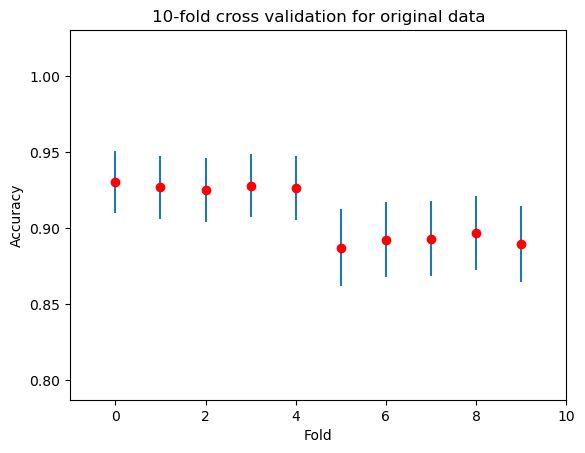

In [14]:
hmm_chart(10,KFold_hmm(newsentences, 10, s=False))

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\1255201757.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


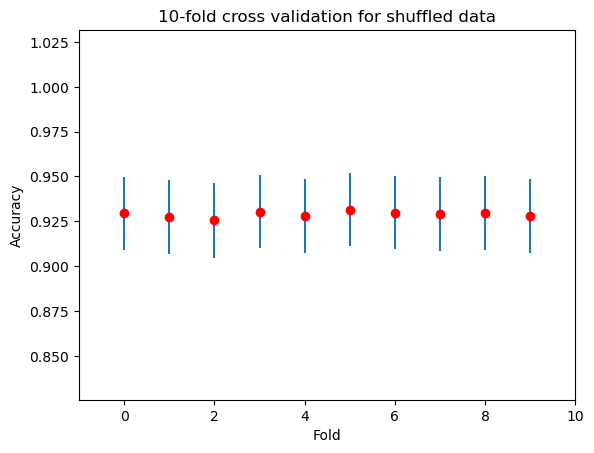

In [15]:
hmm_chart(10,KFold_hmm(newsentences, 10, s=True), text='for shuffled data')

### TNT 

#### Entrenamos un TNT y realizamos un 10-Fold

In [16]:
from nltk.tag import tnt

def tnt_model(data, s=False): 
    # dividir conjunto de entrenamiento: 90% train, 10% test
    train,test= train_test_split(data,test_size=0.1, random_state=1234, shuffle=s) # train test split tiene un shuffle default
    
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(train)  
    acc = tagger_tnt.evaluate(test)
    return acc

In [18]:
print("Accuracy del tagger TNT para el conjunto de datos original:", tnt_model(newsentences, False))
print()
print("Accuracy del tagger TNT para el conjunto de datos barajado:", tnt_model(newsentences, True))

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\441924186.py:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  acc = tagger_tnt.evaluate(test)


Accuracy del tagger TNT para el conjunto de datos original: 0.8334287349742415

Accuracy del tagger TNT para el conjunto de datos barajado: 0.9007118572035699


#### Realizamos un 10-Fold

In [23]:
import numpy as np 
from sklearn.model_selection import KFold 

def KFold_tnt(data, folds, s=False):
    newsentences=np.asarray(data) 
    kf=KFold(n_splits=folds, shuffle=s) # shuffle default=False
    scores=[] 
    longitudes=[]

    for train_index, test_index in kf.split(newsentences):   
        x_train,x_test = newsentences[train_index],newsentences[test_index] 
        longitudes.append(len(x_test))
        tagger_tnt = tnt.TnT()
        tagger_tnt.train(x_train)  
        result = tagger_tnt.accuracy(x_test)  
        scores.append(result)
    
    return scores,longitudes

In [24]:
s,l=KFold_tnt(newsentences, 10, s=False)
for i in s: print('Accuracy del TNT para los datos originales:', i)

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\3731886836.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


Accuracy del TNT para los datos originales: 0.8980735551663748
Accuracy del TNT para los datos originales: 0.8908638464273018
Accuracy del TNT para los datos originales: 0.8886676478226994
Accuracy del TNT para los datos originales: 0.8923700379101486
Accuracy del TNT para los datos originales: 0.8951860999176741
Accuracy del TNT para los datos originales: 0.8444685743484925
Accuracy del TNT para los datos originales: 0.8622758620689656
Accuracy del TNT para los datos originales: 0.8521065205990327
Accuracy del TNT para los datos originales: 0.862639635912288
Accuracy del TNT para los datos originales: 0.8334287349742415


In [25]:
s,l=KFold_tnt(newsentences, 10, s=True)
for i in s: print('Accuracy del TNT para los datos originales:', i)

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\3731886836.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


Accuracy del TNT para los datos originales: 0.9016485766946549
Accuracy del TNT para los datos originales: 0.9036299886562854
Accuracy del TNT para los datos originales: 0.9067977555985898
Accuracy del TNT para los datos originales: 0.9021168231736432
Accuracy del TNT para los datos originales: 0.9049194902696829
Accuracy del TNT para los datos originales: 0.9020482325735051
Accuracy del TNT para los datos originales: 0.9004604143729357
Accuracy del TNT para los datos originales: 0.90804842924956
Accuracy del TNT para los datos originales: 0.9050790127371703
Accuracy del TNT para los datos originales: 0.9037516032492519


#### Visualizamos el resultado del 10-Fold del TNT

In [26]:
import matplotlib.pyplot as plt

def tnt_chart(folds,s, text='for original data'):
    x=[i for i in range(folds)] 
    y,longitudes=s
    ic95=[ic(l[i],y[i]) for i in range(0,len(longitudes))]
    plt.axis([-1,10, min(y)-0.1, max(y)+0.1])#([-1,10, min(scores)-0.1, max(scores)+0.1]) 
    plt.ylabel('Accuracy') 
    plt.xlabel('Fold') 
    plt.title(f'{folds}-fold cross validation {text}')
    plt.errorbar(x,y,yerr=ic95,linestyle='None')
    plt.plot(x,y,'ro') 
    plt.show()

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\3731886836.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


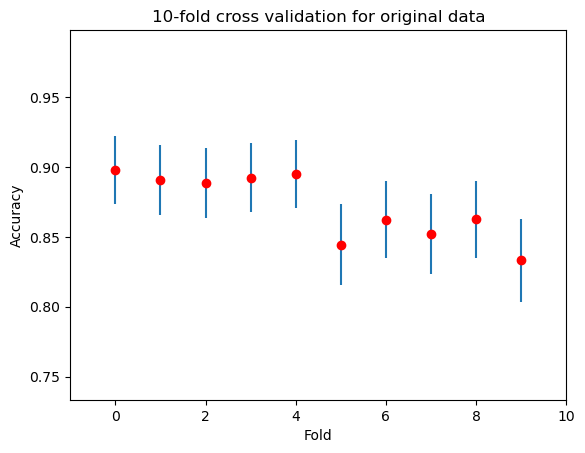

In [27]:
hmm_chart(10,KFold_tnt(newsentences, 10, s=False))

C:\Users\annal\AppData\Local\Temp\ipykernel_23348\3731886836.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(data)


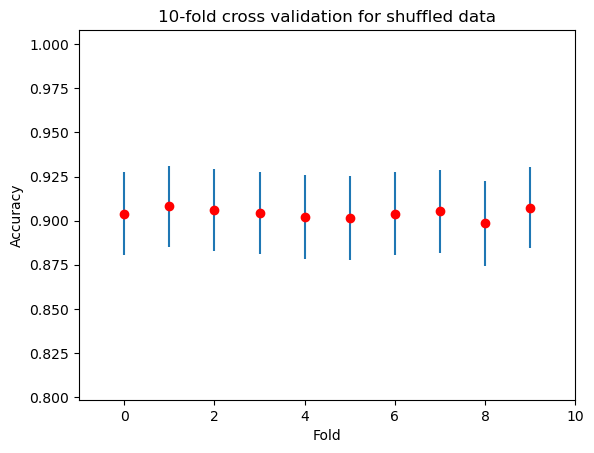

In [28]:
hmm_chart(10,KFold_tnt(newsentences, 10, s=True), text='for shuffled data')

### Conclusiones

- A la vista de los resultados obtenidos, para ambos etiquetadores se obtienen mejores resultados barajando el conjunto de datos de manera general.


- Además se observan diferencias en cuanto al rendimiento de los clasificadores ya que HMM obtiene mejores resultados, tanto con datos barajados como con los datos sin barajar respecto a TNT. 

- Por último, respecto a los resultados para cada fold en el conjunto de datos barajado, para ambos clasificadores, no se observa mucha diferencia entre los accuracy de los diferentes folds. Sin embargo, en los datos originales, también en ambos clasificadores, sí se observan diferencias entre los resultados de cada fold donde los primeros 5 folds tienen unos resultado de accuracy ligeramente mayores que los otros 5 restantes cuyo accuracy es menor.

